In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import re

In [2]:
with open('data/text_code/code1.py') as f:
    text = f.read()

In [3]:
char_freq = Counter(text)
char_freq.most_common(5)

[(' ', 1252), ('e', 263), ('\n', 152), ('i', 142), ('.', 133)]

In [4]:
char_entropy = 0

for freq in char_freq.values():
    prob = freq / len(text)
    char_entropy -= prob * np.log2(prob)

max_char_entropy = np.log2(len(char_freq))

print(f'Entropy: {char_entropy:.4f} bits per character')
print(f'Max Entropy: {max_char_entropy:.4f} bits per character')
print(f'{char_entropy / max_char_entropy * 100:.2f}% of maximum entropy')

Entropy: 4.6529 bits per character
Max Entropy: 6.2288 bits per character
74.70% of maximum entropy


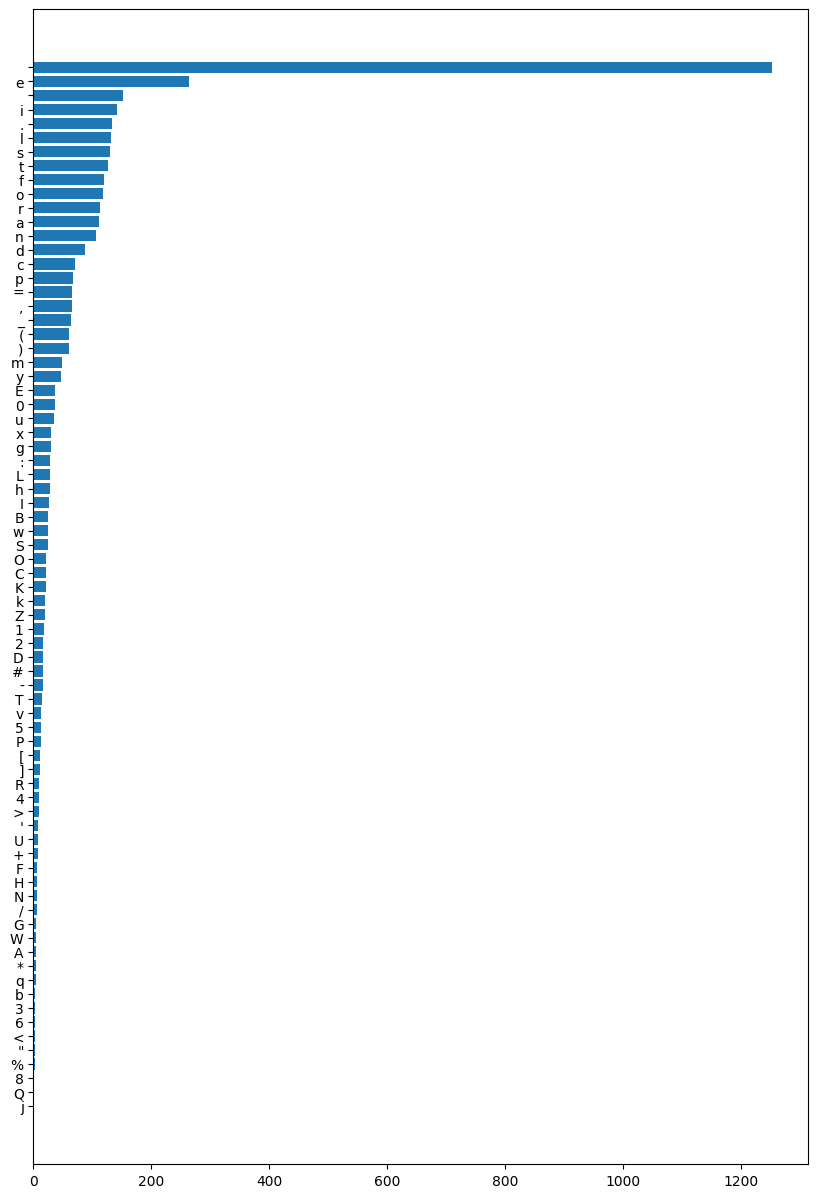

In [5]:
chars, freqs = zip(*char_freq.most_common())
plt.figure(figsize=(10, 15))
plt.barh(chars[::-1], freqs[::-1])
plt.show()


In [6]:
char_distribution_skewness = skew(freqs)
char_distribution_skewness


np.float64(7.152633915780489)

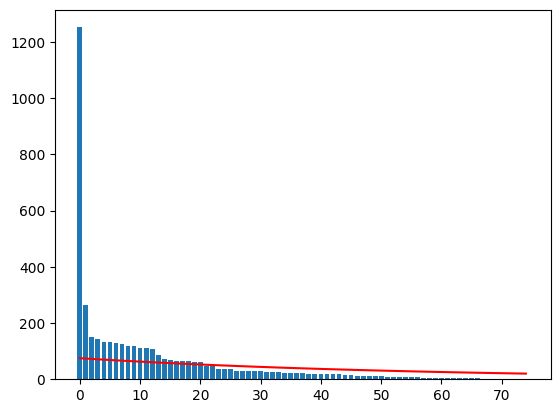

In [7]:
p = 1 / np.mean(freqs)
x = np.linspace(0, len(chars) - 1, len(chars))
y = len(text) * p * (1 - p) ** x
plt.bar(range(len(chars)), freqs)
plt.plot(x, y, color='red')
plt.show()

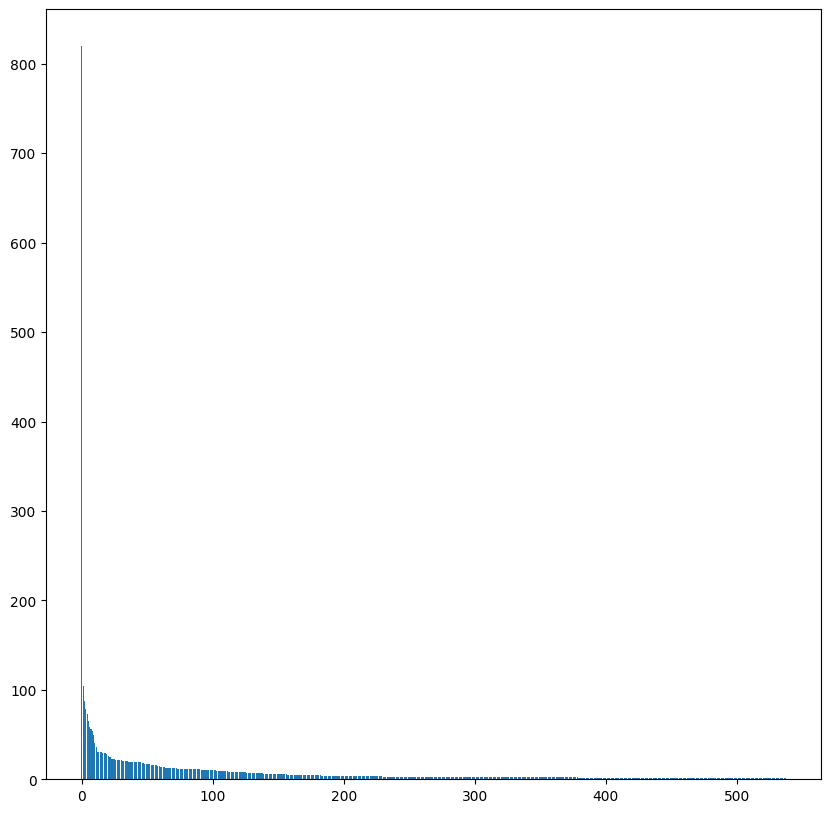

In [8]:

byte_pairs = [text[i-1] + text[i] for i in range(1, len(text))]
byte_pair_freq = Counter(byte_pairs)
plt.figure(figsize=(10, 10))
plt.bar(range(len(byte_pair_freq)), [freq for _, freq in byte_pair_freq.most_common()])
plt.show()

[71, 44, 18, 17, 16, 13, 13, 12, 11, 11, 10, 10, 9, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


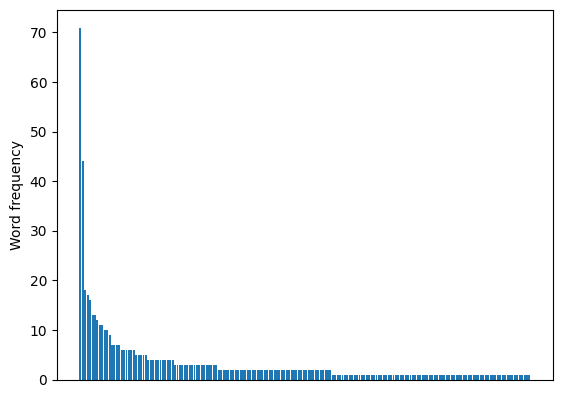

3.3225806451612905
2.0


In [ ]:
words = re.split(r'[ \n,.():]+', text)
word_freq = sorted(list(Counter(words).values()), reverse=True)
plt.bar(range(len(word_freq)), word_freq)
plt.xticks([])
plt.ylabel('Word frequency')
plt.show()
print(np.mean(word_freq))
print(np.median(word_freq))